<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/Machine%20Learning%20Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University Admission Prediction

  In this exercise the goal is to predict weather a student can enter his/her desired university or not.

  The data set, as you will see, contains the information of 400 students with 9 attributes(columns) including Serial number of each students(our we can say each sample),
the [Graduate Record Examinations (GRE)](https://en.wikipedia.org/wiki/Graduate_Record_Examinations),
the [Test of English as a Foreign Language (TOEFL)](https://en.wikipedia.org/wiki/Test_of_English_as_a_Foreign_Language#:~:text=The%20TOEFL%20iBT%20test%20is,to%20determine%20the%20total%20score.),
the [statement of purpose (SOP)](https://blog.nomadcredit.com/statement-purpose-explanation-international-students/),
the [Letter of Recommendation (LOR)](https://whizstorm.com/what-is-a-letter-of-recommendation),
the [Culmulative Grade Point Average(CGPA)](https://byjus.com/cbse/cgpa-calculator/)
scores, the University rating, and also weather the student has at least one research or not.

#### The purpose is to find a good reason to use Logistic Regression and discuss about the downsides of it with respect to how we can implement it from scratch
Lets role into the problem.

# Importing Basic Libararies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualizing
import copy

# Importing Our Dataset

In [ ]:
dataset = pd.read_csv("Admission_Predict.csv")
pd.set_option('display.max_columns',len(dataset.columns))
dataset.head(5)# gives us the first five of the sample dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Let's look at the exact columns' name
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

I'll cut the Serial no. attribute because it's not going to affect our dataset

In [ ]:
# we are goning to seprate the class label ( Chance of Admit ) from the rest.
Y = dataset.iloc[:,-1].values
X = dataset.drop(["Serial No.","Chance of Admit "],axis=1)

# Visualizing Our Dataset

One of the most important aspect of data analyzing, is to first, have a clear vision of the dataset and finding out how we can
rescailing, regenerating(for missing values), and most importantly imabalancing them.

So lets do this step by step...

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


As we can see here, we do not have any missing values.
(the Non-Null count column)

## Description

In [ ]:
X.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


**MEAN** : with having means and take a look at the median(50%) of each attribute,we can rest assured that our dataset does not contain outliers.
*the outliers are dangarous enemies for linear regressions and logistic regression.*

But, we can not rely on these information without having a survey on the histograms.

### Histograms

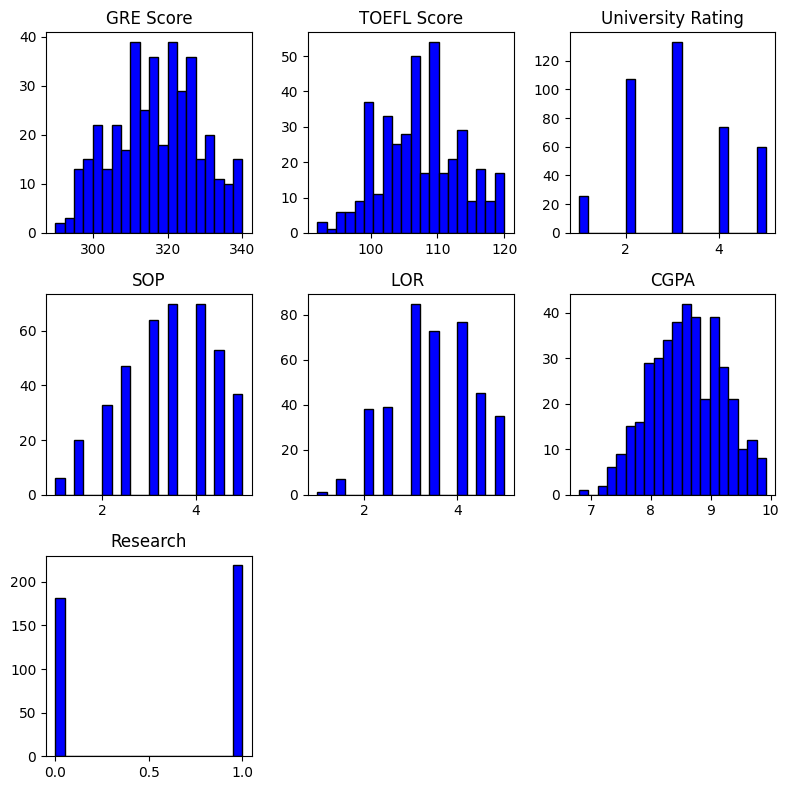

In [ ]:
columns = X.columns
fig = plt.figure(figsize=(8,8))
for i in range(0,7):

    ax = plt.subplot(3, 3, i+1)
    ax.hist(X[columns[i]],bins = 20, color = 'blue', edgecolor = 'black')

    #set title name of each
    ax.set_title(columns[i])

plt.tight_layout()
plt.show()

Histograms are a good informative plots to handle previous missunderstandings of our dataset, especially for continous varibale distribution.
for instance, at the first plot of GRE score, the mean is approximatley 316, but we have biomodal distribution. In others words there is two peaks for our samples in term of this variable. in data analyzing, this means maybe, you can devide this variable into the gender subplots of students, which can lead to so much more information.

Another view of the histograms of SOP, LOR they are skewed to the left. and the reason maybe its that for a good application you need to have a better scores at these exams.

And so musch more information that you can get from histograms to analyizng your data.

#### (if you can help to get more information from the plots abive ,i'll appriciate it:).

## Correlations

In [ ]:
X.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


So, there are some correlations between attributes, but before we judge, lets have more clear vision of these correaltion with heatmap!!

### Heatmap

<Axes: >

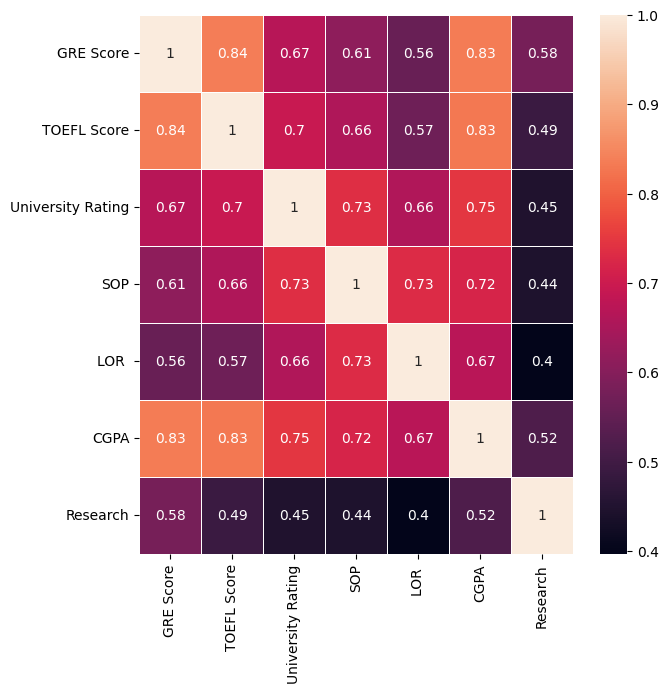

In [ ]:
import seaborn as sb # for vuisualizing
fig, ax = plt.subplots(figsize=(7,7))
sb.heatmap(X.corr(),linewidth = 0.5,annot=True)

Now we can see that there is not such a high correlation to handle it or drop some of them.
because the value of each variance should at most be 1 or -1 to lead us to the conclusion of dropping the attributes that have correlation and using one of them based on our consideration of each.

But does it always work to drop the correleated attributes?

The answer is 'NO'.

The correct answer to it is laid under Multicollinearity.
But what is multicollinearity or collinearity?

> "_In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy._" ___Wikipedia___

According to the definition, there is kind of a relation between two or more attributes. It can affect our model by small degree. The real problem is that, if we have prefect correlation between variables, while the model are trying to find a perfect coefficient for one independent variable to predict the dependent one, it affects the coefficient of the other one, which makes it hard to estimate the coefficients independently.

Obviously, this problem weakens the estimation of each independant variables, which leads us to not a perfect model to predict our dependant variables.
But to cure this problem first you have to have a good reson for that, it's all depends on severity of the problem itself. For example if the correlation of GRE and TOEFEL is 1 or -1 then we have to solve the problem not just by dropping one of them, but by many remedies that statistically can prepare, related to Feature Engineering.

Visit [Wekipedia](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921.) for more information.

Lets dive into fitting our model!

# Seprating the train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split #spiliting
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y,test_size = 0.25,random_state = 1)

# Fitting Linear Regression Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.00443516445108315
R-squared: 0.808229318484456


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


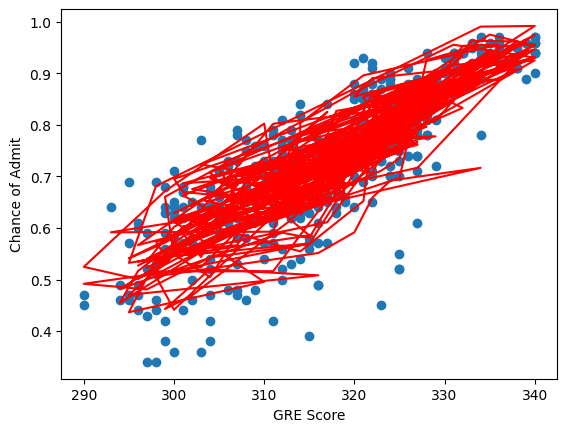

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


R-squared: 0.802061712779061
[0.82662603]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Plot the data and the regression line
plt.scatter(X['GRE Score'], Y)
plt.plot(X['GRE Score'], model.predict(X), color='red')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

# Calculate the R-squared value
R_squared = model.score(X, Y)
print('R-squared:', R_squared)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
new_X = [[330, 120, 4.3, 4.2, 3.6, 8.8, 1]]
predictions = model.predict(new_X)

print(predictions)

# Feature Engineering

1. Create a new feature "LOR*CGPA"
2. Select features with correlation >= 0.5

one of a tricky solution is to estimate a range of thrsholding values:

we will now make a possible list of our threshold and using all of them to get the best answer and result in term of accuracy by fitting a linear regression model.

In [ ]:
# Create a new feature "SOP*CGPA"
X['SOP*CGPA'] = X['SOP'] * X['CGPA']
print(X.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   SOP*CGPA  
0    43.425  
1    35.480  
2    24.000  
3    30.345  
4    16.420  


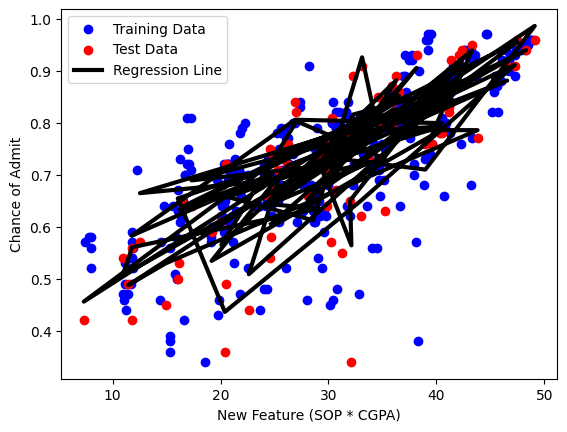

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data from a CSV file
# Replace 'your_dataset.csv' with the actual path to your CSV file
data = pd.read_csv('Admission_Predict.csv')

# Create a new feature by multiplying 'SOP' and 'CGPA'
data['New Feature'] = data['SOP'] * data['CGPA']

# Assuming your CSV has columns named 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'New Feature', and 'Chance of Admit'
X_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'New Feature']
y_column = 'Chance of Admit'

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Plot the training data, test data, and regression line
plt.scatter(X_train['New Feature'], Y_train, color='blue', label='Training Data')
plt.scatter(X_test['New Feature'], Y_test, color='red', label='Test Data')
plt.plot(X_test['New Feature'], Y_pred, color='black', linewidth=3, label='Regression Line')
plt.xlabel('New Feature (SOP * CGPA)')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Serial No.  GRE Score  TOEFL Score  University Rating  ...  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948  ...   
GRE Score           -0.097526   1.000000     0.835977           0.668976  ...   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590  ...   
University Rating   -0.169948   0.668976     0.695590           1.000000  ...   
SOP                 -0.166932   0.612831     0.657981           0.734523  ...   
LOR                 -0.088221   0.557555     0.567721           0.660123  ...   
CGPA                -0.045608   0.833060     0.828417           0.746479  ...   
Research            -0.063138   0.580391     0.489858           0.447783  ...   
Chance of Admit      0.042336   0.802610     0.791594           0.711250  ...   
New Feature         -0.147019   0.690592     0.726127           0.776904  ...   

                       CGPA  Research  Chance of Admit   New Feature  
Serial No.       

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.00443516445108315
Mean Absolute Error (MAE): 0.04503590015138227
R-squared (R2): 0.808229318484456


Feature engineering result:

Before adding a new feature SOP*CGPA
Mean Squared Error: 0.00443516445108315
R-squared: 0.808229318484456

After adding a new feature SOP*CGPA
Mean Squared Error (MSE): 0.00443516445108315
Mean Absolute Error (MAE): 0.04503590015138227
R-squared (R2): 0.808229318484456

No change when a new feature is added SOP*CGPA

# Calculate P-Value

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Get a list of numerical column names
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=numerical_columns, columns=numerical_columns)

# Calculate correlation coefficients and p-values
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            correlation, p_value = pearsonr(data[col1], data[col2])
            p_values_df.at[col1, col2] = p_value

# Display the p-values DataFrame
print("P-values Matrix:")
print(p_values_df)

P-values Matrix:
                  Serial No. GRE Score TOEFL Score University Rating  ...  \
Serial No.               NaN  0.051288     0.00302          0.000642  ...   
GRE Score           0.051288       NaN         0.0               0.0  ...   
TOEFL Score          0.00302       0.0         NaN               0.0  ...   
University Rating   0.000642       0.0         0.0               NaN  ...   
SOP                 0.000803       0.0         0.0               0.0  ...   
LOR                 0.078011       0.0         0.0               0.0  ...   
CGPA                0.362934       0.0         0.0               0.0  ...   
Research            0.207649       0.0         0.0               0.0  ...   
Chance of Admit      0.39842       0.0         0.0               0.0  ...   
New Feature         0.003206       0.0         0.0               0.0  ...   

                       CGPA  Research Chance of Admit  New Feature  
Serial No.         0.362934  0.207649          0.39842    0.003206

# THE END.
